<a href="https://colab.research.google.com/github/Rupesh-rkgit/Sparks_task/blob/main/sparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
import warnings
warnings.filterwarnings('ignore')

import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.utils as sku
import sklearn.linear_model as sklm
import sklearn.neighbors as skn
import sklearn.ensemble as ske
import scipy.stats as sstats
import random
seed = 12
np.random.seed(seed)

from datetime import date

import pandas_profiling as pp

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train =pd.read_csv("/Iris.csv")

In [3]:
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [4]:
y_train = df_train['Species']

In [5]:
df_train = df_train.drop(['Id'], axis=1)

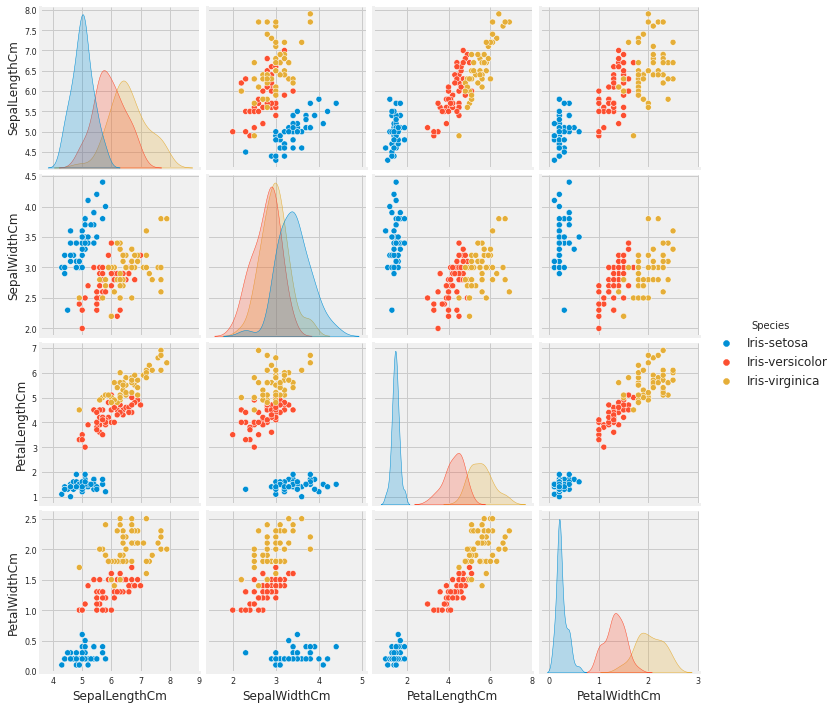

In [6]:

sns.pairplot(df_train, hue='Species')

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [8]:
# df_train=MultiColumnLabelEncoder(columns = ['Species']).fit_transform(df_train)
# df_train.head()

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_train['Species']= label_encoder.fit_transform(df_train['Species'])
  
df_train['Species'].unique()

array([0, 1, 2])

In [10]:
train_features = df_train.copy()
train_labels = train_features.pop('Species')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_features,train_labels,test_size=0.25,random_state =1)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [13]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train,y_train)
accuracy= decision_tree.score(X_test,y_test)

print("The accuracy of decision tree classifier on Iris dataset is :",accuracy)

The accuracy of decision tree classifier on Iris dataset is : 0.9736842105263158


In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [15]:
 from sklearn import tree

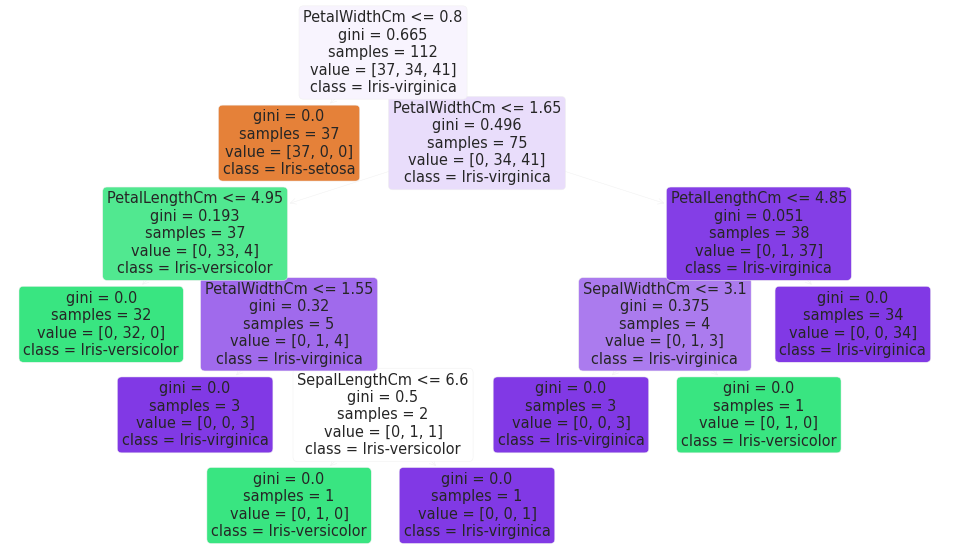

In [16]:
fig = plt.figure(figsize=(15,10)),
_ = tree.plot_tree(decision_tree, 
                   feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                   filled=True,rounded=True)

In [17]:
!pip install dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


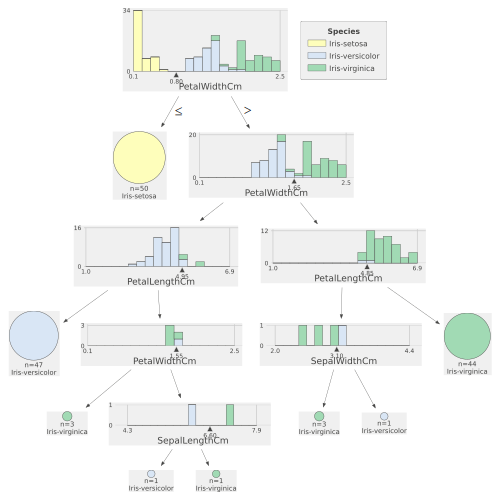

In [18]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(decision_tree, train_features,train_labels,
                target_name="Species",
                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])

viz